# Installing PyCaret

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.

# 2. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import pycaret
from pycaret import classification

# 3. Let's load the dataframe into Pandas dataframe

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_unseen = df_train.sample(n=20, random_state=1)

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The target variable is `Survived`

# 4. Check for missing values within our training dataset

In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 5. Check the column datatypes

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check for class imbalance

# 6. Pycaret Setup

In [ ]:
from pycaret.classification import *
s = setup(data = df_train, target = 'Survived',ignore_features=["Name","Ticket","PassengerId"], session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Ignore features,3
8,Numeric features,5
9,Categorical features,3


# 7. Compare top models

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8346,0.8432,0.7111,0.8378,0.7643,0.6391,0.6479,1.6280
rf,Random Forest Classifier,0.8201,0.8370,0.7236,0.7885,0.7516,0.6118,0.6155,0.3240
gbc,Gradient Boosting Classifier,0.8170,0.8239,0.6986,0.7987,0.7425,0.6023,0.6076,0.2890
lightgbm,Light Gradient Boosting Machine,0.8170,0.8343,0.7072,0.7931,0.7454,0.6039,0.6081,0.2170
lda,Linear Discriminant Analysis,0.8056,0.8446,0.7241,0.7595,0.7382,0.5844,0.5876,0.2020
et,Extra Trees Classifier,0.8025,0.8317,0.7071,0.7621,0.7319,0.5763,0.5786,0.2810
lr,Logistic Regression,0.7992,0.8572,0.7156,0.7525,0.7288,0.5704,0.5752,0.1980
ridge,Ridge Classifier,0.7959,0.8554,0.6989,0.7527,0.7225,0.5620,0.5648,0.2170
xgboost,Extreme Gradient Boosting,0.7833,0.7963,0.6196,0.7686,0.6823,0.5224,0.5313,0.1590
ada,Ada Boost Classifier,0.7752,0.7695,0.6406,0.7404,0.6822,0.5111,0.5173,0.2200


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

# 8. Tune our best model

In [ ]:
tuned_best = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8478,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8413,0.7532,0.7500,0.8182,0.7826,0.6580,0.6595
2,0.8413,0.9509,0.6667,0.8889,0.7619,0.6465,0.6615
3,0.8387,0.8807,0.6522,0.8824,0.7500,0.6349,0.6507
4,0.7581,0.7527,0.4583,0.8462,0.5946,0.4431,0.4854
5,0.7742,0.7966,0.5833,0.7778,0.6667,0.5011,0.5130
6,0.8871,0.8805,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.7903,0.7840,0.7500,0.7200,0.7347,0.5615,0.5618
8,0.7742,0.8306,0.6250,0.7500,0.6818,0.5090,0.5141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# 9. Plot ROC

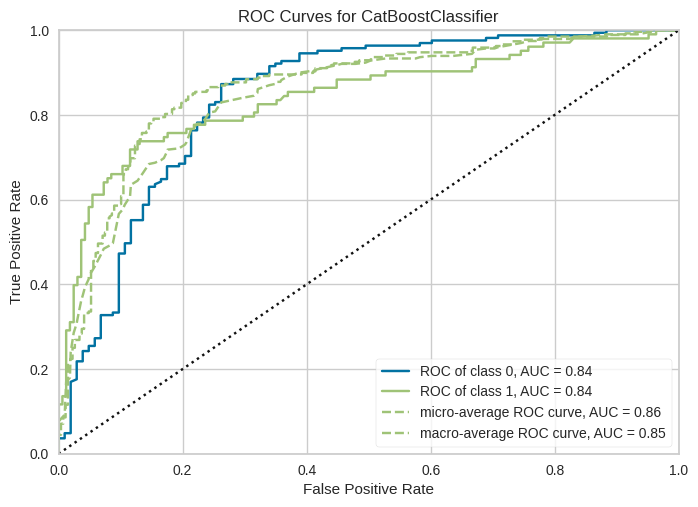

In [ ]:
plot_model(tuned_best, plot = 'auc')

# 10. Plot Confusion Matrix

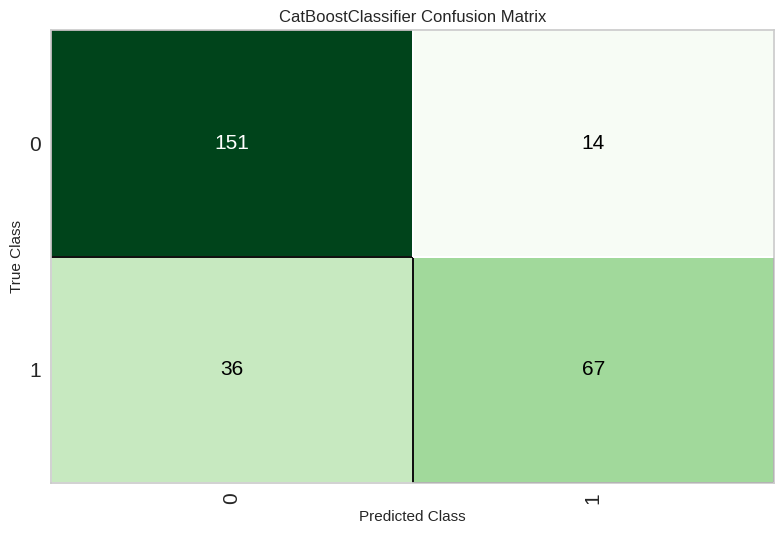

In [ ]:
plot_model(tuned_best, plot = 'confusion_matrix')

# 11. Feature Importance

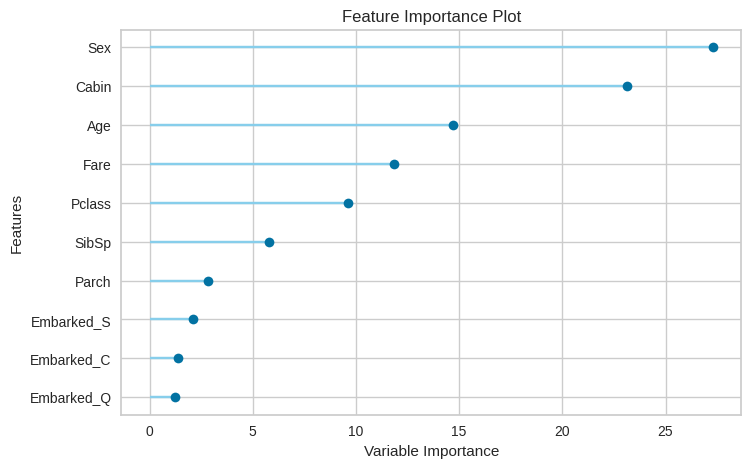

In [ ]:
plot_model(tuned_best, plot='feature')

# 12. Evaluate Model

In [ ]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 13. Save Model

In [ ]:
save_model(tuned_best,'classification_titanic')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Sex...
                                                               verbose=0))),
                 

# 14. Load The Model

In [ ]:
# loading the saved model
saved_final_model = load_model('classification_titanic')

Transformation Pipeline and Model Successfully Loaded


# 15. New Prediction

In [ ]:
new_prediction = predict_model(saved_final_model, data=df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8500,0.9800,0.8000,0.8889,0.8421,0.7000,0.7035


In [ ]:
df_unseen

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
